# core

> Fill in a module description here

In [ ]:
#| default_exp cluster_ejemplo

In [ ]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random 
import numpy as np
import shapely
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

# Puntos
Esto es una clase que nos sirve para generar puntos aleatorios dentro de un cuadrado

In [ ]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)
        
        self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2));
        self.Points =  [shapely.Point(x[0],x[1]) for x in self.Points]

    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_points_arr(self):
        """Una funcion que para obtener los puntos como arrays"""
        array_point = np.asarray(tuple(zip(self.get_X(),self.get_Y())))
        return array_point

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]

    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return 
    

In [ ]:
#| hide

datos_simples = data_points(40)

In [ ]:
#| hide

datos_simples.get_points_arr()

array([[0.61209386, 0.48495783],
       [0.1497853 , 0.94856425],
       [0.70806413, 0.90134548],
       [0.49570145, 0.66530627],
       [0.27643962, 0.55926589],
       [0.00955182, 0.78950437],
       [0.88424825, 0.34293474],
       [0.30155896, 0.85587877],
       [0.9181913 , 0.43511784],
       [0.34836287, 0.07833315],
       [0.50873137, 0.19137919],
       [0.71471135, 0.7801992 ],
       [0.47190268, 0.18181663],
       [0.58301489, 0.69278205],
       [0.66749778, 0.75841646],
       [0.63913036, 0.21427586],
       [0.4442545 , 0.74760762],
       [0.88149288, 0.57391499],
       [0.50014053, 0.34266832],
       [0.81738795, 0.57713465],
       [0.14240631, 0.2721988 ],
       [0.99982133, 0.63591217],
       [0.4429088 , 0.26608644],
       [0.48041877, 0.10133328],
       [0.58304701, 0.63918065],
       [0.10737266, 0.44818575],
       [0.71973631, 0.6791123 ],
       [0.40973375, 0.15582071],
       [0.13636346, 0.12922183],
       [0.48567905, 0.08372677],
       [0.

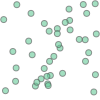

In [ ]:
datos_simples.get_Multypoint()

In [ ]:
#| hide

datos_simples.get_X()

[np.float64(0.6120938561119591),
 np.float64(0.14978530094896647),
 np.float64(0.7080641341561521),
 np.float64(0.4957014547980394),
 np.float64(0.27643962016592694),
 np.float64(0.009551822436015378),
 np.float64(0.8842482521387238),
 np.float64(0.30155895950868417),
 np.float64(0.9181913028640439),
 np.float64(0.34836286861768295),
 np.float64(0.508731372599016),
 np.float64(0.7147113528006481),
 np.float64(0.471902683713883),
 np.float64(0.5830148883705276),
 np.float64(0.667497784326076),
 np.float64(0.6391303558166389),
 np.float64(0.44425450456748494),
 np.float64(0.8814928788108339),
 np.float64(0.5001405305374644),
 np.float64(0.817387951572084),
 np.float64(0.14240631383080837),
 np.float64(0.9998213329886785),
 np.float64(0.44290880271200583),
 np.float64(0.4804187682864133),
 np.float64(0.5830470077799602),
 np.float64(0.10737266162956205),
 np.float64(0.7197363073120574),
 np.float64(0.4097337541608602),
 np.float64(0.13636346058700122),
 np.float64(0.4856790471011314),
 np

In [ ]:
#| hide
datos_simples.get_Y()

[np.float64(0.48495782510621366),
 np.float64(0.9485642461280026),
 np.float64(0.9013454752924073),
 np.float64(0.6653062731407261),
 np.float64(0.5592658889946203),
 np.float64(0.7895043723047387),
 np.float64(0.3429347448600816),
 np.float64(0.8558787671906719),
 np.float64(0.43511783825278505),
 np.float64(0.07833315072084412),
 np.float64(0.19137918975692558),
 np.float64(0.7801991975052105),
 np.float64(0.1818166316722637),
 np.float64(0.6927820478398148),
 np.float64(0.7584164633754804),
 np.float64(0.21427585938598792),
 np.float64(0.7476076174443149),
 np.float64(0.5739149876339912),
 np.float64(0.3426683237515058),
 np.float64(0.577134646039861),
 np.float64(0.27219880301716504),
 np.float64(0.6359121672715333),
 np.float64(0.2660864377426172),
 np.float64(0.10133328102558048),
 np.float64(0.6391806485108343),
 np.float64(0.4481857511668915),
 np.float64(0.6791122985955439),
 np.float64(0.15582071094760197),
 np.float64(0.1292218305960573),
 np.float64(0.08372677154594488),
 n

In [ ]:
#| hide

if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

In [ ]:
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

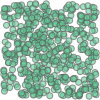

In [ ]:
datos_simples.get_Multypoint()

In [ ]:
#| export
class Clusters:
  """
  Clase para generar los clusters a partir de un objeto de la clase data_points
  
  Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
  se almacena los datos en una estructura de datos y se le añaden las respectivas 
  classes
  """
    
  def __init__(self, data_points_i, seed=1234):
    if seed != None:
      random.seed(seed)
      self.data_structure =  data_points_i
    
  def KMeans(self, **kwargs):
    """
    Se usa el algoritmo Kmeans para la obtencion de clusters, 
    las clases quedan almacenadas en .data_structure_classes_Kmeans.
    Si se desea obtener el modelo se tiene que añadir 
    (ret_model = True) como parámetro.
    """
    kmeans_c = KMeans(**kwargs)
    classes_val = kmeans_c.fit_predict(self.data_structure.get_points_arr())
    self.data_structure.classes_Kmeans = classes_val
    
    if 'ret_model' in kwargs and kwargs['ret_model']==True :
        return  kmeans_c
        

  def DBSCAN(self, **kwargs):
    """
    Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
    en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
    que añadir (ret_model = True) como parámetro.
    """
    db = DBSCAN(**kwargs).fit(self.data_structure.get_points_arr())
    self.data_structure.classes_DBSCAN = db.labels_
    if 'ret_model' in kwargs and kwargs['ret_model']==True :
        return  db
    
    
  def HDBSCAN(self, **kwargs):
    """
    Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
    en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
    que añadir (ret_model = True) como parámetro.
    """
    hdb = HDBSCAN(**kwargs).fit(self.data_structure.get_points_arr())
    self.data_structure.classes_HDBSCAN = hdb.labels_
    if 'ret_model' in kwargs and kwargs['ret_model']==True : 
      return  hdb
        

  def OPTICS(self, **kwargs):
    """
    Se usa el algoritmo OPTICS para la obtencion de clusters, 
    las clases quedan almacenadas en .data_structure_classes_OPTICS.
    Si se desea obtener el modelo se tiene que añadir 
    (ret_model = True) como parámetro.
    """
    optics=  OPTICS(**kwargs).fit(self.data_structure.get_points_arr())
    self.data_structure.classes_OPTICS = optics.labels_
    
    if 'ret_model' in kwargs and kwargs['ret_model']==True :
        return  optics

In [ ]:
#| hide
cluster_all  = Clusters(datos_simples)

In [ ]:
#| hide
cluster_all.KMeans()

In [ ]:
#| hide
cluster_all.DBSCAN()

In [ ]:
#| hide
cluster_all.HDBSCAN()

In [ ]:
#| hide
cluster_all.OPTICS()

In [ ]:

cluster_all.data_structure.classes_DBSCAN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
cluster_all.data_structure.classes_Kmeans

array([5, 0, 6, 7, 0, 2, 3, 3, 0, 3, 0, 4, 4, 1, 7, 4, 7, 7, 7, 7, 0, 6,
       0, 2, 4, 2, 5, 2, 7, 0, 6, 7, 1, 4, 4, 6, 2, 6, 3, 2, 7, 5, 7, 6,
       2, 4, 2, 2, 0, 3, 4, 7, 4, 5, 1, 7, 7, 0, 7, 7, 1, 3, 6, 2, 4, 0,
       2, 6, 5, 3, 1, 6, 4, 2, 0, 0, 7, 2, 3, 6, 0, 0, 7, 7, 5, 5, 2, 0,
       7, 1, 5, 3, 6, 1, 1, 3, 6, 1, 0, 6, 7, 0, 6, 4, 3, 5, 4, 7, 6, 5,
       4, 4, 4, 3, 7, 6, 3, 1, 7, 6, 1, 0, 7, 6, 0, 3, 1, 1, 7, 4, 5, 2,
       0, 6, 4, 5, 6, 0, 6, 4, 3, 6, 2, 5, 0, 2, 6, 2, 3, 5, 4, 3, 7, 4,
       2, 0, 1, 1, 3, 3, 5, 6, 6, 3, 1, 1, 4, 6, 6, 1, 4, 4, 7, 4, 4, 6,
       3, 4, 1, 7, 7, 6, 5, 5, 0, 3, 2, 3, 0, 7, 7, 4, 4, 1, 4, 4, 1, 3,
       2, 7, 6, 7, 4, 3, 3, 4, 6, 2, 6, 3, 4, 6, 0, 1, 0, 4, 5, 1, 2, 0,
       2, 0, 2, 2, 0, 1, 6, 0, 1, 3, 1, 4, 5, 0, 4, 4, 4, 7, 5, 6, 0, 5,
       1, 7, 3, 3, 7, 2, 6, 6, 4, 1, 5, 2, 1, 1, 3, 0, 4, 0, 2, 4, 5, 0,
       4, 4, 5, 6, 0, 1, 3, 2, 3, 6, 7, 3, 5, 6, 0, 6, 1, 2, 3, 4, 1, 2,
       3, 6, 4, 5, 7, 4, 6, 3, 4, 0, 0, 2, 0, 7, 0,

In [ ]:
cluster_all.data_structure.classes_OPTICS

array([-1, -1, -1, 25, 13,  2,  7, 26, 11, -1, -1, -1, 23, 27, 25, 24, 31,
       31, -1, 18, 13, -1, 10, -1, 20, -1, -1, -1, 25, -1,  8, 25, -1, -1,
       -1, 14, -1, 15,  6, -1, 18,  1, -1, 28, -1, -1,  2, -1, -1,  7, 22,
       -1, 21, -1, 27, 18, 31, 26, 25, -1,  4,  9, -1, 16, 20, 10, -1, 14,
        1, 26,  3, -1, -1, -1, 12, 12, 31, 17,  7, 15, -1, -1, 18, 18, -1,
       29, -1, 10, 25,  5, -1,  6, 28, 27, -1, 29, -1, -1, 13, -1, 31, -1,
       15, -1,  7, -1, -1, -1, 15,  0, 21, -1, 30,  6, 25, 28,  6,  5, -1,
       15, -1, -1, 18,  8, 12, 26, -1, 27, -1, 21,  1,  2, -1,  8, -1,  1,
       14, -1, 15, 22,  6, -1, -1, -1, -1,  2, 15,  2,  9, 29, -1,  6, -1,
       21, 16, -1,  5,  3, 29,  7,  1, 14, 28, -1,  3, 27, 22, -1, -1, -1,
       21, -1, 25, 24, 22, 14,  9, -1,  5, 25, 25, -1,  1, -1, 10,  9,  2,
        6, 10, 25, -1, -1, -1, -1, -1, -1, 27, -1, -1, -1, 15, 31, -1,  6,
       -1, 20, 28, -1, 15, 26, 30, 28, 26, -1, -1, 23,  0, -1, 16, 10, -1,
       -1, 16, -1, 17,  3

In [ ]:

datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0, max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4, max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0, max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4, max_y= 0.4 )

In [ ]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)

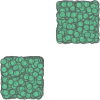

In [ ]:
datos_simples_0.get_Multypoint()

In [ ]:
cluster_all  = Clusters(datos_simples_0)

In [ ]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

<matplotlib.collections.PathCollection>

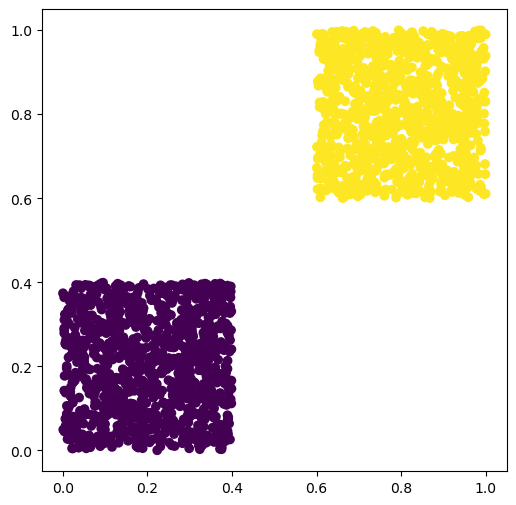

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(6,6))
color_map = matplotlib.colormaps['viridis'].resampled(len(np.unique(cluster_all.data_structure.classes_DBSCAN)))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(cluster_all.data_structure.classes_DBSCAN)))]
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_DBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

<matplotlib.collections.PathCollection>

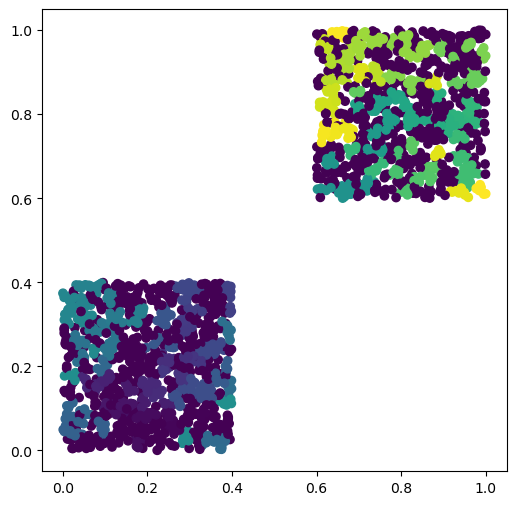

In [ ]:


fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_OPTICS
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )
     


<matplotlib.collections.PathCollection>

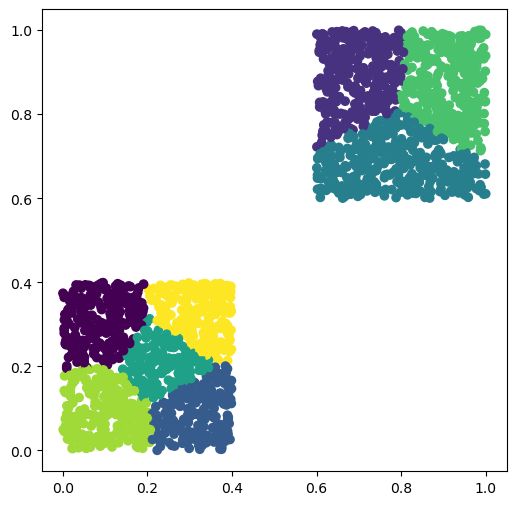

In [ ]:


fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_Kmeans
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )
     


<matplotlib.collections.PathCollection>

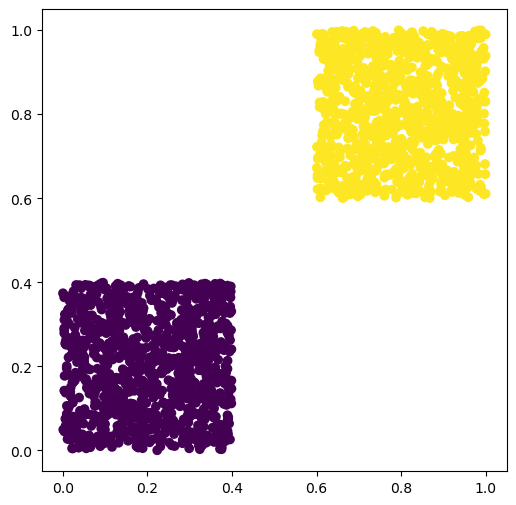

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
        cluster_all.data_structure.get_X(),
        cluster_all.data_structure.get_Y(),
        c = cluster_all.data_structure.classes_HDBSCAN
        #s = cluster_all.data_structure.classes_DBSCAN,
        #c= colors()
    )

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()